***
# Homework 2

**Course:** MATH 616 - Data-Driven Dynamical Systems, Stochastic Modeling and Prediction

**Name:** Shrivats Sudhir

**NetID:** ssudhir2

**Email:** ssudhir2@wisc.edu

***

In [19]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colormaps as cm

# Question 1.

**Assume $x_t$ satisfies the SDE:**
$$d x_t = a_t\;dt + b_t\;dW_t,$$

## (a.)

**Derive the SDE of $f(x_t)$ when $f(x_t)=\frac{1}{2}x^2_t$**

## (b.)

**Derive the SDE of $f(W_t)$ when $f(W_t)=W^4_t$**

# Question 2.

**Consider a two-state Markov chain with state space $S=\{1,2\}$ and transition probabilities $p=0.125$ and $q=0.25$. Numerically generate a long time series, using which to compute the expectation, the probably at each state, and the $n$-step transition probability matrix for $n=10$ and $n=100$. Compare your numerical results with the theoretical solutions.**

Given state space $S=\{1, 2\}$ with transition probabiltiies $p=0.125$ and $q=0.25$, we have the following transition matrix:
$$P = \begin{bmatrix} 1-p & p\\ q & 1-q \end{bmatrix} = \begin{bmatrix} 0.875 & 0.125\\ 0.25 & 0.75 \end{bmatrix}$$

Let initial distribution $\alpha = [0.5, 0.5]$,  i.e., there is a 50-50 chance that initial state is $1$ or $2$.

In [20]:
def random_walk(states, probs, alpha, n):
    pass

states = np.array([1, 2])
probs = np.array([[0.875, 0.125], 
                  [0.25, 0.75]])

# Question 3.

**Use Monte Carlo simulations to compute the mean of a one-dimensional standard Gaussian distribution (with zero mean and variance being $1$). How many Monte Carlo sample points is needed if the standard error is less than $0.05$?**

We know that the formula for standard error ($SE$) is:
$$ SE = \frac{\sigma}{\sqrt{n}} $$

Therefore, in order to achieve standard error less than 0.05, i.e., $SE < 0.05$:
\begin{equation*}
    \begin{split}
        0.05 &> \frac{1}{\sqrt{n}}\\
        0.05 \cdot \sqrt{n}  &> 1\\
        (0.05 \cdot \sqrt{n})^2 &> 1^2\\
        0.0025n &> 1\\
        n &> 400
    \end{split}
\end{equation*}

Thus, we conclude that we need a sample of **at least 400** to achieve a standard error less than $0.05$.

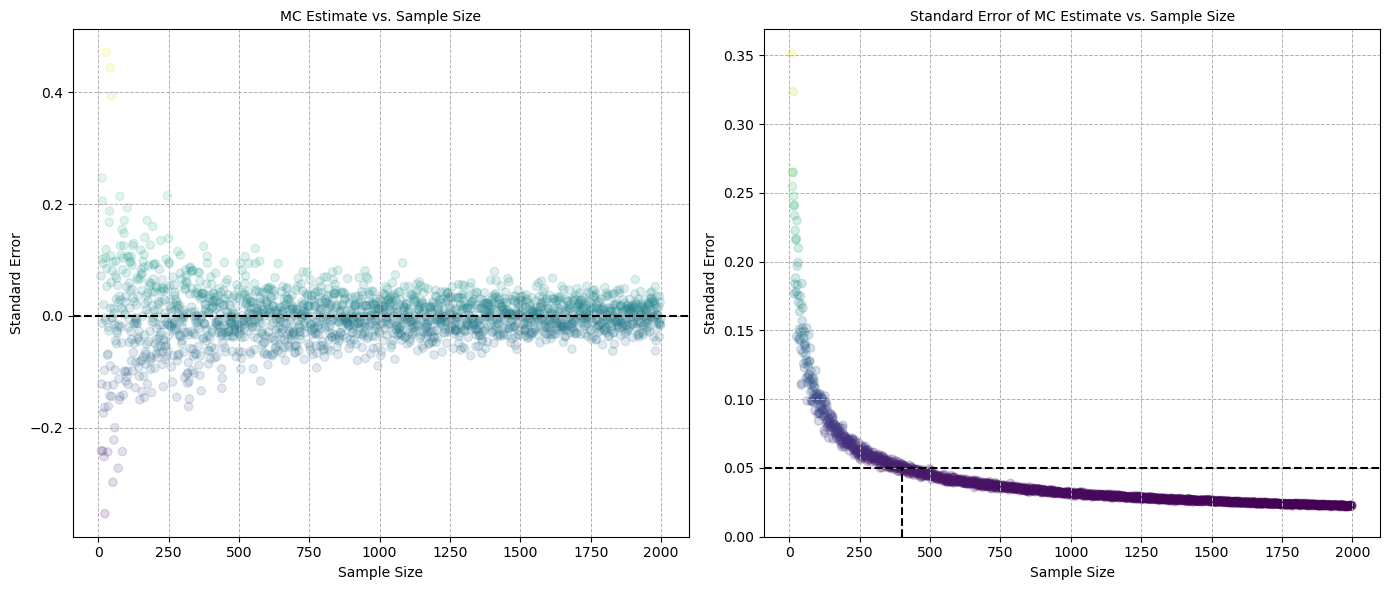

In [31]:
def monte_carlo_mean_and_se(num_points, mean, var):
    """  
    Monte Carlo Simulations to estimate mean for single variable gaussian distribution.
    """
    samples = np.random.normal(mean, var, num_points)    
    mean_estimate = np.mean(samples)    
    standard_error = np.std(samples) / np.sqrt(num_points)
    return mean_estimate, standard_error

mean_estimates = []
standard_errors = []
sample_sizes = range(10, 2000)
for sample_size in sample_sizes:
    mean_estimate, standard_error = monte_carlo_mean_and_se(sample_size, 
                                                            mean=0, 
                                                            var=1)
    mean_estimates.append(mean_estimate)
    standard_errors.append(standard_error)


fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

#################
### Left Subplot
#################

norm = plt.Normalize(min(mean_estimates), max(mean_estimates))
colors = plt.cm.viridis(norm(mean_estimates))
sc = ax0.scatter(sample_sizes, 
                 mean_estimates, 
                 c=mean_estimates, 
                 cmap='viridis', 
                 marker="o", 
                 alpha=0.15, 
                 label="Standard Error")

ax0.axhline(y=0, color="black", linestyle="--")
ax0.set_title("MC Estimate vs. Sample Size", fontsize=10)
ax0.set_xlabel("Sample Size", fontsize=10)
ax0.set_ylabel("Standard Error", fontsize=10)
ax0.grid(True, which='both', linestyle='--', linewidth=0.7)

##################
### Right Subplot
##################

norm = plt.Normalize(min(standard_errors), max(standard_errors))
colors = plt.cm.viridis(norm(standard_errors))
sc = ax1.scatter(sample_sizes, 
                 standard_errors, 
                 c=standard_errors, 
                 cmap='viridis', 
                 marker="o", 
                 alpha=0.2, 
                 label="Standard Error")

ax1.axhline(y=0.05, color="black", linestyle="--")
ax1.plot([400, 400], [0, 0.05], color="black", linestyle="--")
ax1.set_title("Standard Error of MC Estimate vs. Sample Size", fontsize=10)
ax1.set_xlabel("Sample Size", fontsize=10)
ax1.set_ylabel("Standard Error", fontsize=10)
ax1.grid(True, which='both', linestyle='--', linewidth=0.7)
ax1.set_ylim(bottom=0)

plt.tight_layout()
plt.show()

# Question 4.

**Please use Monte Carlo simulation to compute $\sqrt{2}$. Show the standard error as a function of number of samples.**

The Monte Carlo Simuilation algorithm to compute square root of any non-negative number $n$ is as follows:

First, we fix `num_samples` that decides how many times to run the sampling. The larger the number, the more accurate our estimate. Then, our algorithm is as follows:

1. Initialize `points_inside=0`.

2. Randomly sample from uniform distribution between 0, $n$.

3. If random sample squared <= 2, then add one to `points_inside`. Else, resample and repeat 3.

4. After the samples are exhausted, we take the proportion `points_inside/num_samples` and multiply it with our desired square root integer $n$.

In [22]:
def monte_carlo_sqrt(n, num_samples=10000):
    
    """
    Use monte carlo simulation to estimate square root of a number.
    """

    points_inside=0
    for _ in range(num_samples):
        if random.uniform(0, n)**2 <= n:
            points_inside += 1
    estimate = n * (points_inside / num_samples)
    return estimate, np.abs(np.sqrt(n) - estimate)

for i in range(20):
    estimate, error = monte_carlo_sqrt(i)
    print(f"Estimate of sqrt({i}): {estimate}")
    print(f"Absolute error of estimate: {error}")
    print('\n')

Estimate of sqrt(0): 0.0
Absolute error of estimate: 0.0


Estimate of sqrt(1): 1.0
Absolute error of estimate: 0.0


Estimate of sqrt(2): 1.4232
Absolute error of estimate: 0.008986437626904875


Estimate of sqrt(3): 1.7127
Absolute error of estimate: 0.019350807568877304


Estimate of sqrt(4): 1.998
Absolute error of estimate: 0.0020000000000000018


Estimate of sqrt(5): 2.2270000000000003
Absolute error of estimate: 0.009067977499789492


Estimate of sqrt(6): 2.463
Absolute error of estimate: 0.013510257216822197


Estimate of sqrt(7): 2.548
Absolute error of estimate: 0.09775131106459067


Estimate of sqrt(8): 2.8272
Absolute error of estimate: 0.0012271247461903556


Estimate of sqrt(9): 3.0285
Absolute error of estimate: 0.028500000000000192


Estimate of sqrt(10): 3.12
Absolute error of estimate: 0.042277660168379416


Estimate of sqrt(11): 3.3198000000000003
Absolute error of estimate: 0.0031752096446004963


Estimate of sqrt(12): 3.5448
Absolute error of estimate: 0.0806983848

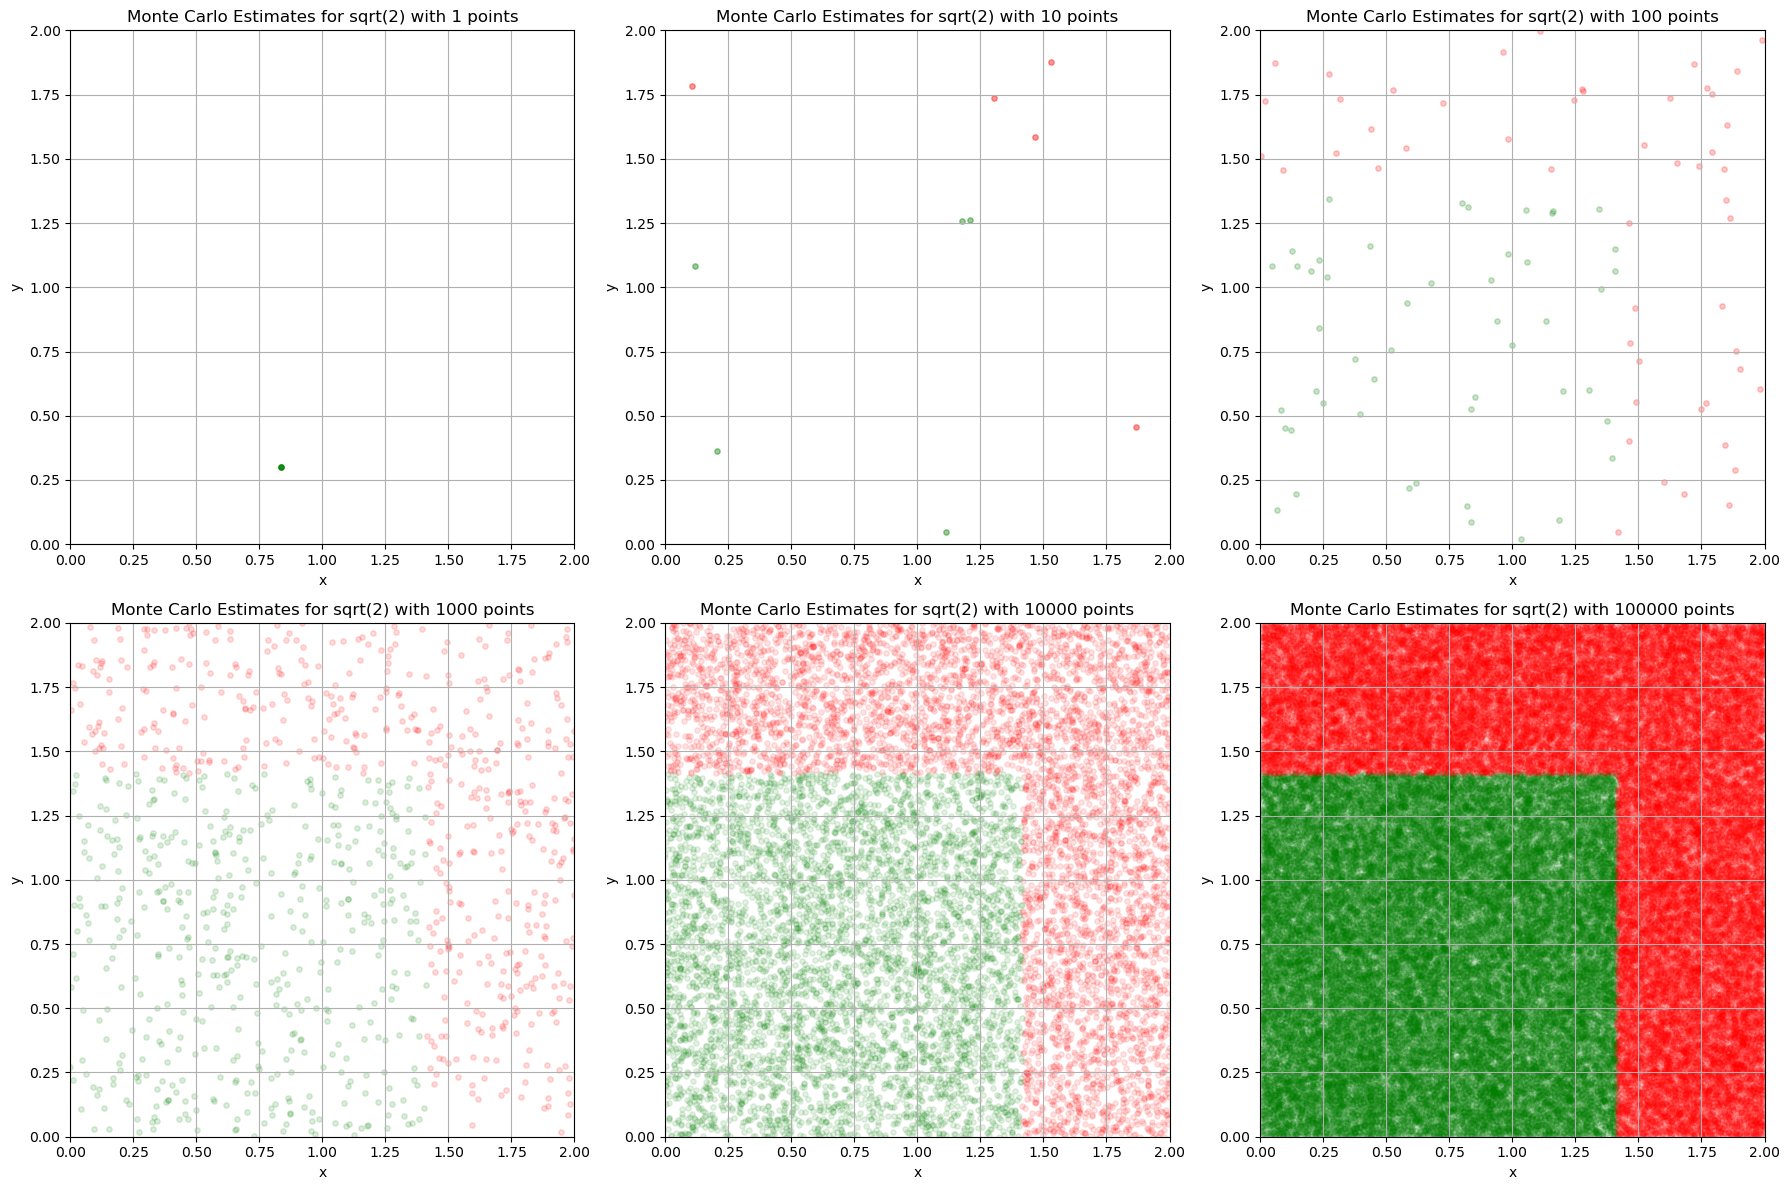

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def plot_monte_carlo_sqrt_subplot(n, sample_sizes):

    """
    Create a 2x3 subplot to visualize the Monte Carlo simulation
    with different numbers of samples.
    """
    
    fig, axs = plt.subplots(2, 3, figsize=(18, 12))  # Changed to 2x3 grid
    
    for i, num_points in enumerate(sample_sizes):
        upper = n
        points_inside = []
        points_outside = []

        for _ in range(num_points):
            x = np.random.uniform(0, upper)
            y = np.random.uniform(0, upper)
        
            if (x**2 <= n) and (y**2 <=n):
                points_inside.append((x, y))
            else:
                points_outside.append((x, y))
    
        points_inside = np.array(points_inside)
        points_outside = np.array(points_outside)

        # Compute alpha, ensuring it is between 0 and 1
        alpha_value = min(1.0, 1 / np.log(num_points + 2))
        
        ax = axs[i//3, i%3]  # Adjusted for 2x3 grid

        if len(points_inside) > 0:
            ax.scatter(points_inside[:, 0], 
                        points_inside[:, 1], 
                        color='green',
                        alpha=alpha_value, 
                        s=15)

        if len(points_outside) > 0:
            ax.scatter(points_outside[:, 0], 
                        points_outside[:, 1], 
                        color='red',
                        alpha=alpha_value, 
                        s=15)

        ax.set_title(f"Monte Carlo Estimates for sqrt({n}) with {num_points} points")
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.grid(True)
        
        ax.set_xlim(0, upper)
        ax.set_ylim(0, upper)
    
    plt.tight_layout()
    return fig, axs

# Call the function with 6 different sample sizes
sample_sizes = [1, 10, 100, 1000, 10000, 100000]
fig, axs = plot_monte_carlo_sqrt_subplot(2, sample_sizes)
plt.show()